2023-06-13 15:38:16.959808: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-13 15:38:16.961350: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 15:38:16.989943: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 15:38:16.990428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 15:38:17.449252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Number of entries: 2938
Class Distribution:
autistic        1469
non_autistic    1469
Name: labels, dtype: int64


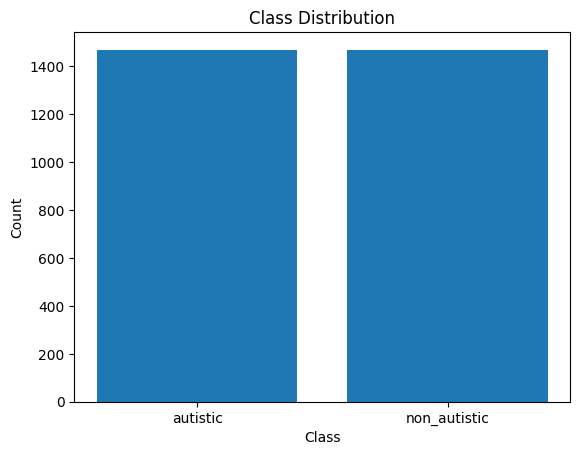

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2
import os, glob
import numpy as np

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('/home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/autism.csv')

# Replace 'labels' with the correct column name representing the class labels
labels = dataset['labels']

# Calculate the frequency of each class
class_counts = labels.value_counts()

# Count the number of entries in the dataset
num_entries = len(dataset)

# Display the number of entries and class distribution
print(f"Number of entries: {num_entries}")
print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## Resize the data

In [2]:
SCALER = 1.1 #increase of the output image by this factor wrt recognized face

def resize_folder(input_f, output_f):
    '''resize the images in input_f keeping the ratio height / width
    to be constant according to a picture with lowest area of face in the same folder; 
    the new images are centered on face
    Return: a tuple (height / width)'''
    mtcnn = MTCNN()
    area = 10000000000
    for im in glob.glob(input_f+'/*'):
        image = cv2.imread(im)
        try:
            data = mtcnn.detect_faces(image)
            box = data[0]['box']
            if box[3] * box[2] < area:
                area = box[3] * box[2]
                height, width = box[3], box[2]
        except:
            pass
    ratio = float(height)/float(width)
    for im in glob.glob(input_f+'/*'):
        image = cv2.imread(im)
        try:
            data = mtcnn.detect_faces(image)
            box = data[0]['box']
            #bimg = image[box[1]: box[1]+int(box[3]*SCALER), box[0]: box[0]+int(box[3]*SCALER/ratio)]
            bimg = image[box[1]: box[1]+int(box[2]* SCALER * ratio), box[0]: box[0]+int(box[2]*SCALER)]
            bimg_res = cv2.resize(bimg, (width,height))
            if os.path.exists(output_f) == False:
                os.mkdir(output_f)
            file_name = im.split(input_f)[-1][1:]
            cv2.imwrite(os.path.join(output_f, file_name), bimg_res)
        except:
            print(f"No faces were recognized in image {im.split(input_f)[-1][1:]}")
            
    return (height, width)

In [3]:
SCALER = 1.1 #increase of the output image by this factor wrt recognized face

def resize(im, height, width):
    '''resize the image according to specified height and width
    so that a new image is centered on face
    Return: an np.array or None'''
    mtcnn = MTCNN()
    image = cv2.imread(im)
    ratio = height / width
    try:
        data = mtcnn.detect_faces(image)
        box = data[0]['box']
        bimg = image[box[1]: box[1]+int(box[2]* SCALER * ratio), box[0]: box[0]+int(box[2]*SCALER)]
        bimg_res = cv2.resize(bimg, (width,height))
        return bimg_res
    except:
        print(f"No faces were recognized in image {im}")
        return None

In [135]:
HOME = '/home/alex/'
data_folder = 'code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/'

train_inp_aut = os.path.join(HOME, data_folder,'train/autistic/')
train_inp_non = os.path.join(HOME, data_folder,'train/non_autistic/')
val_inp_aut = os.path.join(HOME, data_folder,'valid/autistic/')
val_inp_non = os.path.join(HOME, data_folder,'valid/non_autistic/')
test_inp_aut = os.path.join(HOME, data_folder,'test/autistic/')
test_inp_non = os.path.join(HOME, data_folder,'test/non_autistic/')

train_out_aut = os.path.join(HOME, data_folder,'train_res_aut/')
train_out_non = os.path.join(HOME, data_folder,'train_res_non/')
val_out_aut = os.path.join(HOME, data_folder,'valid_res_aut/')
val_out_non = os.path.join(HOME, data_folder,'valid_res_non/')
test_out_aut = os.path.join(HOME, data_folder,'test_res_aut/')
test_out_non = os.path.join(HOME, data_folder,'test_res_non/')

!!!Run cells below only if no resized images are stored!!!

In [4]:
height, width = resize_folder(test_inp_non, test_out_non)

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
No faces were recognized in image 44.jpg
1/1 [==============================] - 0s 18ms/step
No faces were recognized in image 50.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step
No faces were recognized in image 53.jpg
1/1 [==============================] - 0s 18ms/step
No faces were recognized in image 97.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
No faces were recognized in image 90.jpg
1/1 [==============================] - 0s 16ms/step
No faces were recognized in image 32.jpg
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
No faces were recognized in image 34.jpg
1/1 [==============================] - 0s 15ms/step
No faces were recognized in image 55.jpg
1/1 [==============================] - 0s 16ms/step
No faces were recognized in image 31.jpg
1/1 [==============================] - 0s 15ms/step


In [7]:
inp_f = [train_inp_aut, train_inp_non, val_inp_aut, val_inp_non, test_inp_aut]
out_f = [train_out_aut, train_out_non, val_out_aut, val_out_non, test_out_aut]

for i,f in enumerate(inp_f):
    for im in glob.glob(inp_f[i]+'/*'):
        out_im = resize(im, height, width)
        if type(out_im) == np.ndarray:
            if os.path.exists(out_f[i]) == False:
                    os.mkdir(out_f[i])
            file_name = im.split(inp_f[i])[-1][1:]
            cv2.imwrite(os.path.join(out_f[i], file_name), out_im)

1/1 [==============================] - 0s 60ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0343.jpg
1/1 [==============================] - 0s 65ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0191.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0412.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1134.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0728.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0383.jpg
1/1 [==============================] - 0s 108ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1258.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0898.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0921.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0110.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0830.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1004.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0949.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0023.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0985.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0486.jpg
1/1 [==============================] - 0s 90ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0088.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in 

1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0270.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0696.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0218.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1152.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0344.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0605.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0548.jpg


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0447.jpg
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 103ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0063.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1131.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0371.jpg
1/1 [==============================] - 0s 65ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0393.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0666.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0277.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1076.jpg
1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0408.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0709.jpg
1/1 [==============================] - 0s 17ms/step


3/3 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0306.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1235.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0720.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0015.jpg
2/2 [==============================] - 0s 5ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0239.jpg
1/1 [==============================] - 0s 105ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0483.jpg
1/1 [==============================] - 0s 70ms/step


2/2 [==============================] - 0s 3ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1255.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0032.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0665.jpg
1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1132.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1205.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0441.jpg
1/1 [==============================] - 0s 17ms/step


2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0753.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0655.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0541.jpg
1/1 [==============================] - 0s 17ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0920.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0091.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0695.jpg
1/1 [==============================] - 0s 20ms/step


2/2 [==============================] - 0s 6ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0846.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0354.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0421.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0556.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0019.jpg
1/1 [==============================] - 0s 107ms/step
No faces were recognized in 

1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0068.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0976.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0915.jpg
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0516.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1142.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0891.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0256.jpg
1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0151.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0120.jpg
1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0702.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0350.jpg
1/1 [==============================] - 0s 100ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0216.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0823.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0236.jpg
2/2 [==============================] - 0s 6ms/step
No faces were recognized in 

1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1047.jpg
1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0084.jpg
1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0072.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0030.jpg
1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1075.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0673.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0059.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0607.jpg
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0293.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0914.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0056.jpg
1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0604.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0356.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1218.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 115ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0879.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0406.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0716.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0943.jpg
1/1 [==============================] - 0s 65ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1139.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0854.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0240.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0962.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0006.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0640.jpg
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1213.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0403.jpg
1/1 [==============================] - 0s 14ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0274.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0978.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0560.jpg
1/1 [==============================] - 0s 65ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0278.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0386.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0198.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in 

1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1167.jpg
2/2 [==============================] - 0s 5ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0225.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0046.jpg
1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0660.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0719.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in i

1/1 [==============================] - 0s 96ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1206.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1183.jpg
1/1 [==============================] - 0s 106ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1022.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0391.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0086.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0211.jpg
1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0413.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0499.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1094.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0005.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0269.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0076.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0298.jpg
1/1 [==============================] - 0s 17ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0388.jpg
1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0048.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1191.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0215.jpg
1/1 [==============================] - 0s 99ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0877.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0021.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1144.jpg
1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0399.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0807.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0175.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0622.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0591.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in 

1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1037.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0473.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/1119.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0566.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0201.jpg
2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0963.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0090.jpg
1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 16ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0922.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0410.jpg
1/1 [==============================] - 0s 101ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0703.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/autistic/0044.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1062.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognize

1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1208.jpg


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0493.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0996.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0001.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1227.jpg


1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1153.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1187.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1122.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0220.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0187.jpg
1/1 [==============================] - 0s 94ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0550.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0737.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1064.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0074.jpg
1/1 [==============================] - 0s 102ms/step
No face

1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1054.jpg
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1151.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0989.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0988.jpg
1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 91ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1225.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0344.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0329.jpg
1/1 [==============================] - 0s 93ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0437.jpg
1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 132ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0447.jpg
1/1 [==============================] - 0s 134ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1068.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1046.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1228.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0055.jpg
1/1 [==============================] - 0s 71ms/step
No fac

1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0935.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0398.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1204.jpg
1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1033.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1169.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0069.jpg
1/1 [==============================] - 0s 92ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1081.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0895.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0424.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0239.jpg
1/1 [==============================] - 0s 16ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0764.jpg
1/1 [==============================] - 0s 101ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0244.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0268.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0137.jpg
1/1 [==============================] - 0s 77ms/step
No face

1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1249.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1091.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0263.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1155.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1051.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1241.jpg
1/1 [==============================] - 0s 103ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0107.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0939.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0480.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0912.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0931.jpg
1/1 [==============================] - 0s 107ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0427.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0501.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0392.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0260.jpg
1/1 [==============================] - 0s 105ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1165.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0928.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1095.jpg
2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0124.jpg
1/1 [==============================] - 0s 104ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1110.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1220.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1102.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0188.jpg
1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1193.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0993.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0676.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0120.jpg
3/3 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0209.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0417.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0892.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0321.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0159.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1236.jpg
1/1 [==============================] - 0s 70ms/step
No faces

1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0184.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0535.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0008.jpg
1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1058.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0084.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0099.jpg
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1009.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1082.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0446.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1158.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0097.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1075.jpg
1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0472.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0372.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0238.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1019.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1083.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0181.jpg
1/1 [==============================] - 0s 99ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0192.jpg
1/1 [==============================] - 0s 86ms/step
No faces

1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0689.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1218.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0406.jpg
1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0438.jpg
1/1 [==============================] - 0s 74ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1111.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1129.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0066.jpg
1/1 [==============================] - 0s 17ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1139.jpg
2/2 [==============================] - 0s 4ms/step
No faces 

1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0240.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0754.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0297.jpg
1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0451.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0917.jpg
1/1 [==============================] - 0s 91ms/step
No faces

1/1 [==============================] - 0s 102ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0331.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 66ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0897.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1171.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0818.jpg
2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0169.jpg
1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0116.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0808.jpg
1/1 [==============================] - 0s 104ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0171.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0888.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1012.jpg
1/1 [==============================] - 0s 74ms/step
No face

1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0889.jpg
1/1 [==============================] - 0s 69ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0829.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1022.jpg
1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1248.jpg
1/1 [==============================] - 0s 15ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1120.jpg
1/1 [==============================] - 0s 101ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0391.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0578.jpg
1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0365.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1124.jpg
1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1133.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0111.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1174.jpg
1/1 [==============================] - 0s 71ms/step
No faces

1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0076.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0910.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0913.jpg


1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0477.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0047.jpg
1/1 [==============================] - 0s 107ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1005.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0226.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0245.jpg
2/2 [==============================] - 0s 5ms/step
No faces

1/1 [==============================] - 0s 81ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0232.jpg
1/1 [==============================] - 0s 19ms/step


2/2 [==============================] - 0s 5ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0389.jpg
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0419.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0208.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1037.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0138.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1201.jpg
1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1143.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1119.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0233.jpg
1/1 [==============================] - 0s 103ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0952.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0924.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0368.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/1061.jpg


1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0977.jpg
1/1 [==============================] - 0s 18ms/step


2/2 [==============================] - 0s 4ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0410.jpg
1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/train/non_autistic/0182.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/087.jpg
1/1 [==============================] - 0s 75ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/058.jpg
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 87ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/008.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/037.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/089.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/099.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/023.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image

1/1 [==============================] - 0s 73ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/048.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/038.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/016.jpg
1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 18ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/090.jpg
1/1 [==============================] - 0s 72ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/072.jpg
1/1 [==============================] - 0s 71ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/032.jpg
1/1 [==============================] - 0s 84ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/020.jpg
1/1 [==============================] - 0s 76ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/040.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image

1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/047.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/autistic/098.jpg
1/1 [==============================] - 0s 67ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/044.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/087.jpg
1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 102ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/067.jpg
2/2 [==============================] - 0s 5ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/016.jpg
1/1 [==============================] - 0s 70ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/033.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 86ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/valid/non_autistic/047.jpg
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/005.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/068.jpg
1/1 [==============================] - 0s 79ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/056.jpg
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 151ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/006.jpg
1/1 [==============================] - 0s 83ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/001.jpg
1/1 [==============================] - 0s 82ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/010.jpg
1/1 [==============================] - 0s 68ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/003.jpg
1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 80ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/067.jpg
1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/096.jpg
1/1 [==============================] - 0s 97ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/032.jpg
1/1 [==============================] - 0s 77ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/021.jpg
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 78ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/018.jpg
1/1 [==============================] - 0s 88ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/017.jpg
1/1 [==============================] - 0s 148ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/066.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 85ms/step
No faces were recognized in image /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/test/autistic/031.jpg
1/1 [==============================] - 0s 82ms/step


## CNN part

load the data:

In [5]:
def load_the_data(folder_one, folder_zero):
    X, y = [],[]

    for im in glob.glob(folder_one+'/*'):
        image = cv2.imread(im)
        X.append(image)
        y.append(1)

    for im in glob.glob(folder_zero+'/*'):
        image = cv2.imread(im)
        X.append(image)
        y.append(0)

    return (np.array(X), np.array(y))
    

X, y = load_the_data(train_out_aut, train_out_non)
X_val, y_val = load_the_data(val_out_aut, val_out_non)
X_test, y_test = load_the_data(test_out_aut, test_out_non)

scale the data

In [6]:
def scaled_data(data):
    return data/255

In [7]:
X_sc = scaled_data(X)
X_val_sc = scaled_data(X_val)
X_test_sc = scaled_data(X_test)

prepare for the model initialization:

In [186]:
from tensorflow.keras import layers, models, Sequential

def model_init2D(shape):
    '''initialize the model with given shape of pictures'''
    
    model = Sequential()
    model.add(layers.Conv2D(16, kernel_size=(6,6), activation='relu', padding='same', input_shape=shape))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(32, kernel_size=(4,4), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.1))
    
    #model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    #model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.Dropout(0.1))
    
    model.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall','accuracy'])
    
    return model


In [120]:
def model_VGG16(shape):
    '''initialize the model with given shape of pictures'''
    
    model = Sequential()
    model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=shape))
    model.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [121]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3

def model_EffNet(shape):
    model = EfficientNetB3(include_top=False, weights="imagenet", input_shape=shape, pooling='max')
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [187]:
from tensorflow.keras.callbacks import EarlyStopping

def fit_model(X, y, model, batch_size=32, epochs=100):
    '''fits the model and returns history'''
    
    es = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X, y, batch_size=32, epochs=epochs, callbacks=[es], validation_data=(X_val_sc, y_val))
    
    return history

initialize the model:

In [188]:
shape = X_sc[0].shape
model = model_init2D(shape)
#model = model_VGG16(shape)
#model = model_EffNet(shape)

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 64, 58, 16)        1744      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 32, 29, 16)       0         
 g2D)                                                            
                                                                 
 dropout_49 (Dropout)        (None, 32, 29, 16)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 29, 26, 32)        8224      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 14, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 14, 13, 32)      

Baseline:

In [77]:
1-y.sum()/len(y)

0.5043668122270742

fit the model:

In [189]:
history = fit_model(X_sc, y, model, 32, 150)

Epoch 1/150
58/58 [==============================] - 2s 24ms/step - loss: 0.6840 - recall: 0.5606 - accuracy: 0.5524 - val_loss: 0.6379 - val_recall: 0.5641 - val_accuracy: 0.6395
Epoch 2/150
58/58 [==============================] - 1s 22ms/step - loss: 0.6508 - recall: 0.6322 - accuracy: 0.6316 - val_loss: 0.6319 - val_recall: 0.5641 - val_accuracy: 0.6628
Epoch 3/150
58/58 [==============================] - 1s 22ms/step - loss: 0.6304 - recall: 0.6564 - accuracy: 0.6485 - val_loss: 0.5761 - val_recall: 0.5385 - val_accuracy: 0.7035
Epoch 4/150
58/58 [==============================] - 2s 30ms/step - loss: 0.6157 - recall: 0.6905 - accuracy: 0.6676 - val_loss: 0.5914 - val_recall: 0.7821 - val_accuracy: 0.7035
Epoch 5/150
58/58 [==============================] - 2s 36ms/step - loss: 0.5989 - recall: 0.6894 - accuracy: 0.6796 - val_loss: 0.5452 - val_recall: 0.5769 - val_accuracy: 0.7326
Epoch 6/150
58/58 [==============================] - 2s 36ms/step - loss: 0.5864 - recall: 0.7236 - 

In [190]:
print(f"Loss: {np.mean(history.history['loss'])}")
print(f"Accuracy: {np.mean(history.history['accuracy'])}")
print(f"Recall: {np.mean(history.history['recall'])}")
print(f"Validation loss: {np.mean(history.history['val_loss'])}")
print(f"Validation accuracy: {np.mean(history.history['val_accuracy'])}")
print(f"Validation recall: {np.mean(history.history['val_recall'])}")

Loss: 0.5701821403844016
Accuracy: 0.6951029300689697
Recall: 0.7029578345162528
Validation loss: 0.573594195502145
Validation accuracy: 0.7093023189476558
Validation recall: 0.6941392038549695


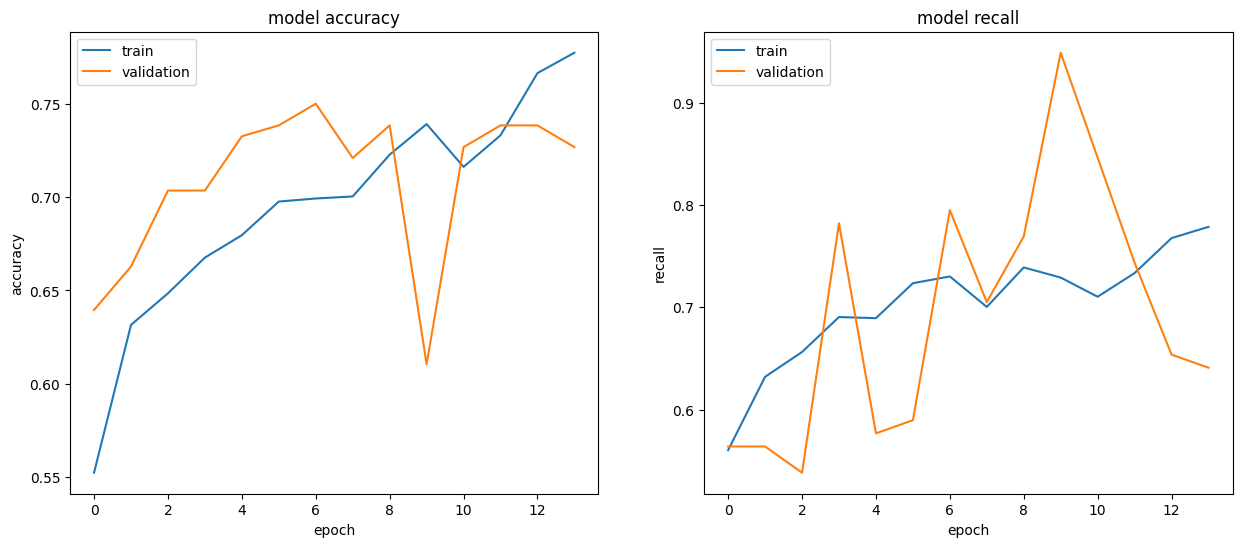

In [194]:
def plot_hist(hist):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    
    plt.subplot(122)
    plt.plot(hist.history["recall"])
    plt.plot(hist.history["val_recall"])
    plt.title("model recall")
    plt.ylabel("recall")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    
    plt.show()

plot_hist(history);

test predictions:

In [198]:
#y_pred = model.predict(X_test_sc)
#y_pred_1 = []
#for item in y_pred:
#    y_pred_1.append(round(np.mean(item)))
#print(f'Prediction accuracy is {1 - sum(abs(y_pred_1 - y_test))/len(y_test)}')

In [200]:
test = model.evaluate(X_test_sc, y_test)
print(f"Test accuracy is {round(test[-1], 2)} and recall - {round(test[1], 2)}")

6/6 [==============================] - 0s 7ms/step - loss: 0.5126 - recall: 0.6941 - accuracy: 0.7614
Test accuracy is 0.76 and recall - 0.69


## Save the model

In [136]:
model.save(os.path.join(HOME, data_folder,'my_model'))

2023-06-13 17:39:47.508997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32,29,16]
	 [[{{node inputs}}]]
2023-06-13 17:39:47.517555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,13,32]
	 [[{{node inputs}}]]
2023-06-13 17:39:47.525923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,6,6,64]
	 [[{{node inputs}}]]
202

INFO:tensorflow:Assets written to: /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/my_model/assets


INFO:tensorflow:Assets written to: /home/alex/code/bakiery/Autism-in-Children-A-CNN-Approach/raw_data/autism/my_model/assets
